In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline 
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import skew
import statistics as stats

In [4]:
# "merge" the erp and web data sets and you've got laison as the mapping table.
#If you want to do this all in Python, then simplest way would be to load these 3 data sets in dataframes then
#Join df_erp and df_laison
#Join web to the resulting dataframe from previous step
#pandas.DataFrame.join
#pandas.DataFrame.merge

In [5]:
liaison= pd.read_excel('liaison.xlsx')
liaison


/Applications/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [6]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [7]:
liaison['id_web'].unique()

array([15298, 15296, 15300, 19814, 19815, 15303, 14975, 16042, 14980,
       16041, 15269, 14977, 16044, 16043, 16449, 16045, 16030, 13127,
       19816, nan, 16029, 16039, 16318, 16275, 16498, 16320, 16319, 15966,
       15022, 15967, 15490, 16416, 11862, 15444, 15953, 12045, 13074,
       15941, 16069, 13072, 15440, 13435, 13078, 13117, 16296, 16014,
       16462, 16013, 16180, 15676, 16120, 15564, 15675, 15378, 15813,
       13416, 14905, 15767, 16505, 15683, 16504, 15787, 14800, 15353,
       15382, 15339, 11668, 13209, 15341, 13217, 304, 11641, 1662, 1360,
       15648, 1364, 7086, 1366, 15140, 16238, 16237, 15141, 14944, 14941,
       14751, 16093, 15668, 15373, 15375, 14474, 15482, 13453, 15075,
       16124, 15785, 15784, 15786, 14332, 16210, 16211, 16209, 15629,
       15583, 16160, 16166, 15783, 16560, 15747, 15746, 16190, 16189,
       16265, 16191, 16263, 15605, 16529, 15441, 13032, 16256, 16322,
       16295, 15656, 15655, 15415, 15414, 15413, 16023, 16024, 15720,
       1

In [8]:
#liaison['id_web'] = liaison['id_web'].replace('bon-cadeau-25-euros', ' ')
#liaison['id_web']= liaison['id_web'].replace('13127-1', '13127')
#liaison['id_web']= liaison['id_web'].replace('14680-1', '14680')
#new_lison = liaison
#new_lison

In [9]:
liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64


# Export de l’ERP contenant les références produit 

In [10]:
erp = pd.read_excel('erp.xlsx') 
erp.head

/Applications/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<bound method NDFrame.head of      product_id  onsale_web  price  stock_quantity stock_status
0          3847           1   24.2               0   outofstock
1          3849           1   34.3               0   outofstock
2          3850           1   20.8               0   outofstock
3          4032           1   14.1               0   outofstock
4          4039           1   46.0               0   outofstock
..          ...         ...    ...             ...          ...
820        7203           0   45.0              30      instock
821        7204           0   45.0               9      instock
822        7247           1   54.8              23      instock
823        7329           0   26.5              14      instock
824        7338           1   16.3              45      instock

[825 rows x 5 columns]>

In [11]:
erp['product_id'].isnull().sum()

#erp.set_index('product_id')

0

In [12]:
erp.info()
#verfy the primary key 

#erp.set_index('product_id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [13]:
erp[erp['onsale_web']==1].sum()

product_id                                                  3607985
onsale_web                                                      717
price                                                       23472.1
stock_quantity                                                20525
stock_status      outofstockoutofstockoutofstockoutofstockoutofs...
dtype: object

# CMS contenant les informations des produits commercialisés en ligne 

In [15]:
cms = pd.read_excel('web.xlsx')
cms.head()

/Applications/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [16]:
cms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [17]:
unique = cms['sku'].unique()
qu = len(unique)
qu

715

In [18]:
null = cms['sku'].isnull().sum()
null

85

In [19]:
nul= cms[cms['sku'].isnull()]
nul

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
nul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    0 non-null      object        
 1   virtual                85 non-null     int64         
 2   downloadable           85 non-null     int64         
 3   rating_count           85 non-null     int64         
 4   average_rating         2 non-null      float64       
 5   total_sales            2 non-null      float64       
 6   tax_status             2 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            2 non-null      float64       
 9   post_date              2 non-null      datetime64[ns]
 10  post_date_gmt          2 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             2 non-null      object        
 13  post

In [21]:
totl = nul[nul['total_sales'].notnull()]
totl

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [22]:

def assess_Nan(data):
    '''Returns a dataframe with total number of Na values and 
    the percntage of Nan values in each column
    the column names are noted on the index'''
    
    #pandas series denoting features and the sum of the their nul values
    null_sum = data.isnull().sum()
    
    #instantiat columns for missing data
    total = null_sum.sort_values(ascending = False)
    percent = (((null_sum/ len(data.index)) *100).round(2)).sort_values(ascending= False)
    
    #concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis = 1, keys = ['Number of NA', 'Percent NA'])
    
    df_NA = df_NA[(df_NA.T !=0).any()]
    return df_NA

In [23]:
df_NA = assess_Nan(cms)
df_NA

,Number of NA,Percent NA
tax_class,1513,100.00
post_content_filtered,1513,100.00
post_content,1513,100.00
post_password,1513,100.00
post_mime_type,799,52.81
tax_status,797,52.68
post_excerpt,797,52.68
sku,85,5.62
ping_status,83,5.49
post_type,83,5.49


# clening / imputing 

In [24]:
#drop columns that have 100 % null values & not needed


to_drop = ['virtual','downloadable',
           'rating_count',
           'average_rating','tax_class',
           'post_content_filtered','post_parent',
           
           'menu_order', 'post_password','post_content',
           'post_mime_type','comment_count',
          'tax_status', 'comment_status','ping_status']


new_cms = cms.drop(labels=to_drop, axis=1)
new_cms

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,NaN,publish,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1509,15891,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,NaN,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1510,15887,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,NaN,publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1511,13127-1,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


In [25]:
#new_cms['sku'] = new_cms['sku'].replace('bon-cadeau-25-euros', ' Nan')# when rmoving a value rplace it with nan
#new_cms['sku']= new_cms['sku'].replace('13127-1', '13127')
#new_cms['sku']= new_cms['sku'].replace('14680-1', '14680')
#new_cms_g = new_cms
#new_cms_g

In [26]:
rem_col_cms = new_cms.rename({'sku':'id_web'}, axis = 1, inplace = False)
rem_col_cms

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,NaN,publish,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1509,15891,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,NaN,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1510,15887,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,NaN,publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1511,13127-1,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


# Joining dataframe  liaison/ erp on id_product


In [27]:
#outer give me all the results the matched and the othere
#first join
merged_erp_lison = pd.merge(liaison, erp, how ='outer', on=['product_id'])
merged_erp_lison

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock
...,...,...,...,...,...,...
820,7203,NaN,0,45.0,30,instock
821,7204,NaN,0,45.0,9,instock
822,7247,13127-1,1,54.8,23,instock
823,7329,14680-1,0,26.5,14,instock


In [28]:
merged_erp_lison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   id_web          734 non-null    object 
 2   onsale_web      825 non-null    int64  
 3   price           825 non-null    float64
 4   stock_quantity  825 non-null    int64  
 5   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 45.1+ KB


In [29]:
df_mergetd = assess_Nan(merged_erp_lison)
df_mergetd

,Number of NA,Percent NA
id_web,91,11.03


In [30]:
merged_erp_lison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   id_web          734 non-null    object 
 2   onsale_web      825 non-null    int64  
 3   price           825 non-null    float64
 4   stock_quantity  825 non-null    int64  
 5   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 45.1+ KB


# joining two datafram new_cms to merged_erp_lison  on id_web


In [31]:
merged_cms_lison = pd.merge(merged_erp_lison, rem_col_cms,
                            
                            how ='outer', on=['id_web'])
merged_cms_lison

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,3847,15298,1,24.2,0,outofstock,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
1,3847,15298,1,24.2,0,outofstock,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
2,3849,15296,1,34.3,0,outofstock,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,3849,15296,1,34.3,0,outofstock,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,NaN,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
4,3850,15300,1,20.8,0,outofstock,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9178,7247,13127-1,1,54.8,23,instock,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product
9179,7247,13127-1,1,54.8,23,instock,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
9180,7329,14680-1,0,26.5,14,instock,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
9181,7338,16230,1,16.3,45,instock,0.0,2.0,2020-07-20 11:00:00,2020-07-20 09:00:00,Domaine Saint-Nicolas Vin de France Blanc Les ...,Issu d'un assemblage de chenin blanc et de cha...,publish,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,https://www.bottle-neck.fr/?post_type=product&...,product


In [32]:
merged_cms_lison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9183 entries, 0 to 9182
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         9183 non-null   int64         
 1   id_web             1448 non-null   object        
 2   onsale_web         9183 non-null   int64         
 3   price              9183 non-null   float64       
 4   stock_quantity     9183 non-null   int64         
 5   stock_status       9183 non-null   object        
 6   total_sales        1610 non-null   float64       
 7   post_author        1610 non-null   float64       
 8   post_date          1610 non-null   datetime64[ns]
 9   post_date_gmt      1610 non-null   datetime64[ns]
 10  post_title         1610 non-null   object        
 11  post_excerpt       896 non-null    object        
 12  post_status        1610 non-null   object        
 13  post_name          1610 non-null   object        
 14  post_mod

In [33]:
#some of the values , has productes but they do not have id_web and or id product 

df_product = merged_cms_lison.loc[merged_cms_lison['post_type'] == 'product']
df_product

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,3847,15298,1,24.2,0,outofstock,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,3849,15296,1,34.3,0,outofstock,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
4,3850,15300,1,20.8,0,outofstock,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
6,4032,19814,1,14.1,0,outofstock,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
8,4039,19815,1,46.0,0,outofstock,0.0,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,6930,16135,1,8.4,83,instock,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product
9174,7023,15891,1,27.5,15,instock,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
9176,7025,15887,1,69.0,2,instock,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
9178,7247,13127-1,1,54.8,23,instock,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product


In [34]:
df_prod_nan= assess_Nan(df_product)
df_prod_nan

,Number of NA,Percent NA
id_web,182,20.31


In [35]:
nul = df_product[df_product['id_web'].isnull()]
nul

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
60,4055,NaN,0,86.1,0,outofstock,0.0,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product
61,4055,NaN,0,86.1,0,outofstock,0.0,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product
145,4090,NaN,0,73.0,0,outofstock,0.0,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product
146,4090,NaN,0,73.0,0,outofstock,0.0,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product
230,4092,NaN,0,47.0,0,outofstock,0.0,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7541,7201,NaN,0,31.0,18,instock,0.0,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product
7625,7203,NaN,0,45.0,30,instock,0.0,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product
7626,7203,NaN,0,45.0,30,instock,0.0,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product
7710,7204,NaN,0,45.0,9,instock,0.0,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product


In [36]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 9181
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         896 non-null    int64         
 1   id_web             714 non-null    object        
 2   onsale_web         896 non-null    int64         
 3   price              896 non-null    float64       
 4   stock_quantity     896 non-null    int64         
 5   stock_status       896 non-null    object        
 6   total_sales        896 non-null    float64       
 7   post_author        896 non-null    float64       
 8   post_date          896 non-null    datetime64[ns]
 9   post_date_gmt      896 non-null    datetime64[ns]
 10  post_title         896 non-null    object        
 11  post_excerpt       896 non-null    object        
 12  post_status        896 non-null    object        
 13  post_name          896 non-null    object        
 14  post_modi

In [37]:
insotck_prod = df_product[df_product['stock_status']=='instock']
insotck_prod

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
12,4041,14975,1,32.7,15,instock,0.0,2.0,2018-02-12 09:45:14,2018-02-12 08:45:14,Pierre Gaillard Condrieu 2018,Un joli nez de fruits exotiques comme le litch...,publish,pierre-gaillard-condrieu-2018,2020-08-14 18:15:02,2020-08-14 16:15:02,https://www.bottle-neck.fr/?post_type=product&...,product
14,4042,16042,1,31.2,34,instock,7.0,2.0,2018-02-12 09:54:27,2018-02-12 08:54:27,Pierre Gaillard Cornas 2017,Une jolie robe grenat avec des reflets violacé...,publish,pierre-gaillard-cornas-2017,2020-08-14 10:15:02,2020-08-14 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,product
16,4043,14980,1,60.0,12,instock,3.0,2.0,2018-02-12 10:03:05,2018-02-12 09:03:05,Pierre Gaillard Côte Rôtie Esprit de Blonde 2017,"Complexité, finesse et subtilité sont au rende...",publish,pierre-gaillard-cote-rotie-esprit-blond-2017,2020-08-24 14:00:03,2020-08-24 12:00:03,https://www.bottle-neck.fr/?post_type=product&...,product
18,4045,16041,1,42.6,66,instock,14.0,2.0,2018-02-12 10:09:03,2018-02-12 09:09:03,Pierre Gaillard Côte Rôtie 2018,Ce vin exprime la diversité et l'équilibre ent...,publish,pierre-gaillard-cote-rotie-2018,2020-08-03 09:55:03,2020-08-03 07:55:03,https://www.bottle-neck.fr/?post_type=product&...,product
22,4047,14977,1,18.3,36,instock,0.0,2.0,2018-02-12 10:28:30,2018-02-12 09:28:30,Pierre Gaillard Côtes-du-Rhône Blanc Les Gendr...,"Vin frais, floral et fruité, minéral, ample et...",publish,pierre-gaillard-gendrines-2018,2020-08-27 09:30:07,2020-08-27 07:30:07,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,6930,16135,1,8.4,83,instock,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product
9174,7023,15891,1,27.5,15,instock,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
9176,7025,15887,1,69.0,2,instock,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
9178,7247,13127-1,1,54.8,23,instock,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product


In [38]:
insotck_prod['chifr_par_prod'] = insotck_prod['total_sales'] * insotck_prod['price']

/var/folders/60/5b9_rz6d6qn1yvxznrxvrtxm0000gn/T/ipykernel_22363/4204402378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insotck_prod['chifr_par_prod'] = insotck_prod['total_sales'] * insotck_prod['price']


In [39]:
insotck_prod

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type,chifr_par_prod
12,4041,14975,1,32.7,15,instock,0.0,2.0,2018-02-12 09:45:14,2018-02-12 08:45:14,Pierre Gaillard Condrieu 2018,Un joli nez de fruits exotiques comme le litch...,publish,pierre-gaillard-condrieu-2018,2020-08-14 18:15:02,2020-08-14 16:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
14,4042,16042,1,31.2,34,instock,7.0,2.0,2018-02-12 09:54:27,2018-02-12 08:54:27,Pierre Gaillard Cornas 2017,Une jolie robe grenat avec des reflets violacé...,publish,pierre-gaillard-cornas-2017,2020-08-14 10:15:02,2020-08-14 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,218.4
16,4043,14980,1,60.0,12,instock,3.0,2.0,2018-02-12 10:03:05,2018-02-12 09:03:05,Pierre Gaillard Côte Rôtie Esprit de Blonde 2017,"Complexité, finesse et subtilité sont au rende...",publish,pierre-gaillard-cote-rotie-esprit-blond-2017,2020-08-24 14:00:03,2020-08-24 12:00:03,https://www.bottle-neck.fr/?post_type=product&...,product,180.0
18,4045,16041,1,42.6,66,instock,14.0,2.0,2018-02-12 10:09:03,2018-02-12 09:09:03,Pierre Gaillard Côte Rôtie 2018,Ce vin exprime la diversité et l'équilibre ent...,publish,pierre-gaillard-cote-rotie-2018,2020-08-03 09:55:03,2020-08-03 07:55:03,https://www.bottle-neck.fr/?post_type=product&...,product,596.4
22,4047,14977,1,18.3,36,instock,0.0,2.0,2018-02-12 10:28:30,2018-02-12 09:28:30,Pierre Gaillard Côtes-du-Rhône Blanc Les Gendr...,"Vin frais, floral et fruité, minéral, ample et...",publish,pierre-gaillard-gendrines-2018,2020-08-27 09:30:07,2020-08-27 07:30:07,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,6930,16135,1,8.4,83,instock,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,42.0
9174,7023,15891,1,27.5,15,instock,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
9176,7025,15887,1,69.0,2,instock,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
9178,7247,13127-1,1,54.8,23,instock,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,0.0


In [40]:
insotck_prod.loc['Total_chif_prodi']= pd.Series(insotck_prod['chifr_par_prod'].sum(), index=['chifr_par_prod'])

insotck_prod

/var/folders/60/5b9_rz6d6qn1yvxznrxvrtxm0000gn/T/ipykernel_22363/2600804381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insotck_prod.loc['Total_chif_prodi']= pd.Series(insotck_prod['chifr_par_prod'].sum(), index=['chifr_par_prod'])


,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type,chifr_par_prod
12,4041.0,14975,1.0,32.7,15.0,instock,0.0,2.0,2018-02-12 09:45:14,2018-02-12 08:45:14,Pierre Gaillard Condrieu 2018,Un joli nez de fruits exotiques comme le litch...,publish,pierre-gaillard-condrieu-2018,2020-08-14 18:15:02,2020-08-14 16:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
14,4042.0,16042,1.0,31.2,34.0,instock,7.0,2.0,2018-02-12 09:54:27,2018-02-12 08:54:27,Pierre Gaillard Cornas 2017,Une jolie robe grenat avec des reflets violacé...,publish,pierre-gaillard-cornas-2017,2020-08-14 10:15:02,2020-08-14 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,218.4
16,4043.0,14980,1.0,60.0,12.0,instock,3.0,2.0,2018-02-12 10:03:05,2018-02-12 09:03:05,Pierre Gaillard Côte Rôtie Esprit de Blonde 2017,"Complexité, finesse et subtilité sont au rende...",publish,pierre-gaillard-cote-rotie-esprit-blond-2017,2020-08-24 14:00:03,2020-08-24 12:00:03,https://www.bottle-neck.fr/?post_type=product&...,product,180.0
18,4045.0,16041,1.0,42.6,66.0,instock,14.0,2.0,2018-02-12 10:09:03,2018-02-12 09:09:03,Pierre Gaillard Côte Rôtie 2018,Ce vin exprime la diversité et l'équilibre ent...,publish,pierre-gaillard-cote-rotie-2018,2020-08-03 09:55:03,2020-08-03 07:55:03,https://www.bottle-neck.fr/?post_type=product&...,product,596.4
22,4047.0,14977,1.0,18.3,36.0,instock,0.0,2.0,2018-02-12 10:28:30,2018-02-12 09:28:30,Pierre Gaillard Côtes-du-Rhône Blanc Les Gendr...,"Vin frais, floral et fruité, minéral, ample et...",publish,pierre-gaillard-gendrines-2018,2020-08-27 09:30:07,2020-08-27 07:30:07,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9174,7023.0,15891,1.0,27.5,15.0,instock,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
9176,7025.0,15887,1.0,69.0,2.0,instock,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
9178,7247.0,13127-1,1.0,54.8,23.0,instock,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
9181,7338.0,16230,1.0,16.3,45.0,instock,0.0,2.0,2020-07-20 11:00:00,2020-07-20 09:00:00,Domaine Saint-Nicolas Vin de France Blanc Les ...,Issu d'un assemblage de chenin blanc et de cha...,publish,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,0.0


In [41]:
val_null_id_web = df_product.isnull().sum()
val_null_id_web

product_id             0
id_web               182
onsale_web             0
price                  0
stock_quantity         0
stock_status           0
total_sales            0
post_author            0
post_date              0
post_date_gmt          0
post_title             0
post_excerpt           0
post_status            0
post_name              0
post_modified          0
post_modified_gmt      0
guid                   0
post_type              0
dtype: int64

In [42]:
df_product

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,3847,15298,1,24.2,0,outofstock,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,3849,15296,1,34.3,0,outofstock,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
4,3850,15300,1,20.8,0,outofstock,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
6,4032,19814,1,14.1,0,outofstock,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
8,4039,19815,1,46.0,0,outofstock,0.0,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,6930,16135,1,8.4,83,instock,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product
9174,7023,15891,1,27.5,15,instock,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
9176,7025,15887,1,69.0,2,instock,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
9178,7247,13127-1,1,54.8,23,instock,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product


In [43]:
onasal = df_product[df_product['onsale_web']==1]
onasal

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,3847,15298,1,24.2,0,outofstock,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,3849,15296,1,34.3,0,outofstock,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
4,3850,15300,1,20.8,0,outofstock,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
6,4032,19814,1,14.1,0,outofstock,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
8,4039,19815,1,46.0,0,outofstock,0.0,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,6930,16135,1,8.4,83,instock,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product
9174,7023,15891,1,27.5,15,instock,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
9176,7025,15887,1,69.0,2,instock,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
9178,7247,13127-1,1,54.8,23,instock,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product


In [44]:
onasal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 9181
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         720 non-null    int64         
 1   id_web             714 non-null    object        
 2   onsale_web         720 non-null    int64         
 3   price              720 non-null    float64       
 4   stock_quantity     720 non-null    int64         
 5   stock_status       720 non-null    object        
 6   total_sales        720 non-null    float64       
 7   post_author        720 non-null    float64       
 8   post_date          720 non-null    datetime64[ns]
 9   post_date_gmt      720 non-null    datetime64[ns]
 10  post_title         720 non-null    object        
 11  post_excerpt       720 non-null    object        
 12  post_status        720 non-null    object        
 13  post_name          720 non-null    object        
 14  post_modi

In [45]:
df_onsal_na = assess_Nan(onasal)
df_onsal_na

,Number of NA,Percent NA
id_web,6,0.83


In [46]:
onsal_null = onasal[onasal['id_web'].isnull()]
onsal_null

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
995,4594,NaN,1,144.0,0,outofstock,0.0,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product
996,4594,NaN,1,144.0,0,outofstock,0.0,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product
2440,5070,NaN,1,84.7,0,outofstock,0.0,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product
2441,5070,NaN,1,84.7,0,outofstock,0.0,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product
2525,5075,NaN,1,43.3,0,outofstock,0.0,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product
2526,5075,NaN,1,43.3,0,outofstock,0.0,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product


In [47]:
drop_dup_idweb = onasal.drop_duplicates(subset = "id_web")
drop_dup_idweb

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,3847,15298,1,24.2,0,outofstock,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,3849,15296,1,34.3,0,outofstock,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
4,3850,15300,1,20.8,0,outofstock,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
6,4032,19814,1,14.1,0,outofstock,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
8,4039,19815,1,46.0,0,outofstock,0.0,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,6930,16135,1,8.4,83,instock,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product
9174,7023,15891,1,27.5,15,instock,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
9176,7025,15887,1,69.0,2,instock,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
9178,7247,13127-1,1,54.8,23,instock,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product


In [48]:
drop_dup_idweb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 9181
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         715 non-null    int64         
 1   id_web             714 non-null    object        
 2   onsale_web         715 non-null    int64         
 3   price              715 non-null    float64       
 4   stock_quantity     715 non-null    int64         
 5   stock_status       715 non-null    object        
 6   total_sales        715 non-null    float64       
 7   post_author        715 non-null    float64       
 8   post_date          715 non-null    datetime64[ns]
 9   post_date_gmt      715 non-null    datetime64[ns]
 10  post_title         715 non-null    object        
 11  post_excerpt       715 non-null    object        
 12  post_status        715 non-null    object        
 13  post_name          715 non-null    object        
 14  post_modi

In [49]:
drop_dup_idweb

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,3847,15298,1,24.2,0,outofstock,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,3849,15296,1,34.3,0,outofstock,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
4,3850,15300,1,20.8,0,outofstock,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
6,4032,19814,1,14.1,0,outofstock,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
8,4039,19815,1,46.0,0,outofstock,0.0,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,6930,16135,1,8.4,83,instock,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product
9174,7023,15891,1,27.5,15,instock,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
9176,7025,15887,1,69.0,2,instock,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
9178,7247,13127-1,1,54.8,23,instock,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product


In [50]:
value_naidweb = drop_dup_idweb[drop_dup_idweb['id_web'].isnull()]

value_naidweb

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
995,4594,NaN,1,144.0,0,outofstock,0.0,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product


In [51]:
drop_dup_idweb

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,3847,15298,1,24.2,0,outofstock,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,3849,15296,1,34.3,0,outofstock,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
4,3850,15300,1,20.8,0,outofstock,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
6,4032,19814,1,14.1,0,outofstock,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
8,4039,19815,1,46.0,0,outofstock,0.0,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,6930,16135,1,8.4,83,instock,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product
9174,7023,15891,1,27.5,15,instock,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
9176,7025,15887,1,69.0,2,instock,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
9178,7247,13127-1,1,54.8,23,instock,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product


In [52]:
drop_dup_idweb['chef_prod_onlin'] = drop_dup_idweb['total_sales'] * drop_dup_idweb['price']
drop_dup_idweb

/var/folders/60/5b9_rz6d6qn1yvxznrxvrtxm0000gn/T/ipykernel_22363/2957748586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_dup_idweb['chef_prod_onlin'] = drop_dup_idweb['total_sales'] * drop_dup_idweb['price']


,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type,chef_prod_onlin
0,3847,15298,1,24.2,0,outofstock,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,145.2
2,3849,15296,1,34.3,0,outofstock,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
4,3850,15300,1,20.8,0,outofstock,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
6,4032,19814,1,14.1,0,outofstock,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,42.3
8,4039,19815,1,46.0,0,outofstock,0.0,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,6930,16135,1,8.4,83,instock,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,42.0
9174,7023,15891,1,27.5,15,instock,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
9176,7025,15887,1,69.0,2,instock,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
9178,7247,13127-1,1,54.8,23,instock,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,0.0


In [53]:
drop_dup_idweb.loc['Total_pro_online']= pd.Series(drop_dup_idweb['chef_prod_onlin'].sum(), index=['chef_prod_onlin'])

drop_dup_idweb

/var/folders/60/5b9_rz6d6qn1yvxznrxvrtxm0000gn/T/ipykernel_22363/2887528587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_dup_idweb.loc['Total_pro_online']= pd.Series(drop_dup_idweb['chef_prod_onlin'].sum(), index=['chef_prod_onlin'])


,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type,chef_prod_onlin
0,3847.0,15298,1.0,24.2,0.0,outofstock,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,145.2
2,3849.0,15296,1.0,34.3,0.0,outofstock,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
4,3850.0,15300,1.0,20.8,0.0,outofstock,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
6,4032.0,19814,1.0,14.1,0.0,outofstock,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,42.3
8,4039.0,19815,1.0,46.0,0.0,outofstock,0.0,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9174,7023.0,15891,1.0,27.5,15.0,instock,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
9176,7025.0,15887,1.0,69.0,2.0,instock,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
9178,7247.0,13127-1,1.0,54.8,23.0,instock,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
9181,7338.0,16230,1.0,16.3,45.0,instock,0.0,2.0,2020-07-20 11:00:00,2020-07-20 09:00:00,Domaine Saint-Nicolas Vin de France Blanc Les ...,Issu d'un assemblage de chenin blanc et de cha...,publish,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,0.0


#  Plot and detect any possible outliers : prix des produits

# 1-  identify outliers using Z score 

 Formual for z score = (observation - Mean)/ Standerd Deviation 
 
 z = (x-μ) / σ
 

In [54]:
df_product['price'].describe()

count    896.000000
mean      32.803013
std       26.401321
min        5.200000
25%       15.300000
50%       25.900000
75%       42.700000
max      225.000000
Name: price, dtype: float64

In [55]:
def plot_boxplot(df, prx):
    plt.boxplot(df[prx])
    plt.xlabel('outlier values (Price of products)')
    plt.grid(False)
    plt.show()

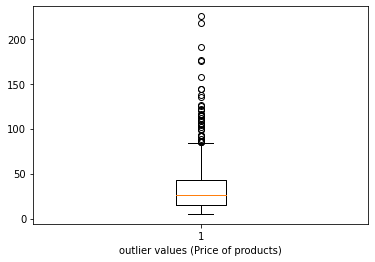

In [56]:
plot_boxplot(df_product, 'price')


# defin the outliers 

In [57]:
outliers = []

def detect_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        
        if np.abs(z_score)> threshold:
            outliers.append(i)
    return outliers

In [58]:
outlier_pt = detect_outliers(df_product['price'])
outlier_pt

[144.0,
 144.0,
 225.0,
 126.5,
 176.0,
 157.0,
 137.0,
 217.5,
 112.0,
 124.8,
 175.0,
 191.3,
 122.0,
 114.0,
 135.0,
 116.4,
 115.0,
 121.0,
 115.0,
 121.0]

In [59]:
out_valu_num = len(outlier_pt)
print('outliers = ', out_valu_num, 'values')

outliers =  20 values


# removeing outliers 

In [60]:
df2 = df_product['price']
df2

0       24.2
2       34.3
4       20.8
6       14.1
8       46.0
        ... 
9172     8.4
9174    27.5
9176    69.0
9178    54.8
9181    16.3
Name: price, Length: 896, dtype: float64

In [61]:
df_product2 = df_product[~df_product['price'].isin(outlier_pt)]
df_product2

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,3847,15298,1,24.2,0,outofstock,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,3849,15296,1,34.3,0,outofstock,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
4,3850,15300,1,20.8,0,outofstock,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
6,4032,19814,1,14.1,0,outofstock,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
8,4039,19815,1,46.0,0,outofstock,0.0,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,6930,16135,1,8.4,83,instock,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product
9174,7023,15891,1,27.5,15,instock,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
9176,7025,15887,1,69.0,2,instock,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
9178,7247,13127-1,1,54.8,23,instock,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product


In [62]:
leng = len(df_product2['price'])
leng

876

# Plotting Distribution of Data

In [63]:
summray = df_product2['price'].describe()
summray['var'] = summray['std']**2
sumr = summray
sumr

count    876.000000
mean      30.253425
std       19.875900
min        5.200000
25%       14.900000
50%       25.000000
75%       41.000000
max      109.600000
var      395.051383
Name: price, dtype: float64

<AxesSubplot:title={'center':'Distribution of data '}>

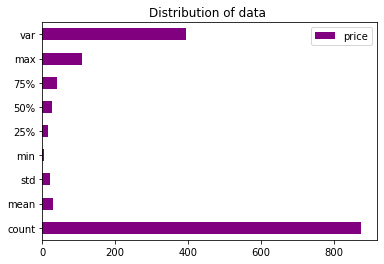

In [64]:
sumr.plot(kind = "barh", y = "mean", legend = True,
            title = "Distribution of data ", color = '#800080')

# Calculate Measures of Shape  skew( right Posv)

#Formula of skewness is : 3(Mean - madian) / std 
 
 S = 3 ( μ - Md ) / σ
 
 if S < 0, the distribution is negativley skewd(skewd to the left)
 
 if S = 0, the distribution is Symmetric (not skewd).
 
 if S > 0, the distribution is positively skewd(skewd to the right).

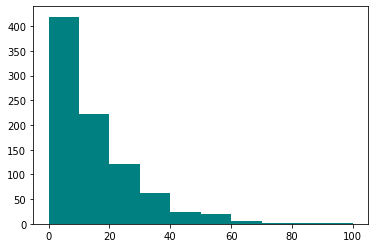

Mean =  14.335616438356164
Median =  10.0
std =  13.797844479890205
mode =  2


In [65]:
data = np.random.randint(df_product2['price'])
bin= [0,10,20,30,40,50,60,70,80,90,100]

plt.hist(data, bin, color= "#008080")
plt.show()
print('Mean = ', np.mean(data))
print('Median = ', np.median(data))
print('std = ', np.std(data))
print('mode = ', stats.mode(data))

#print('Skewness', skew(data))

# just test Transformation 

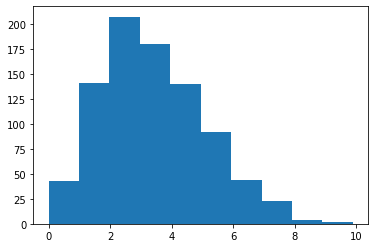

skewness after squere root transformation =  0.3830333499976248


In [66]:
trans = np.sqrt(data)
plt.hist(trans)
plt.show()
print('skewness after squere root transformation = ', skew(trans))


# End
